In [1]:
from simulators.poisson_simulator import PoissonSimulator
import numpy as np
import matplotlib.pyplot as plt

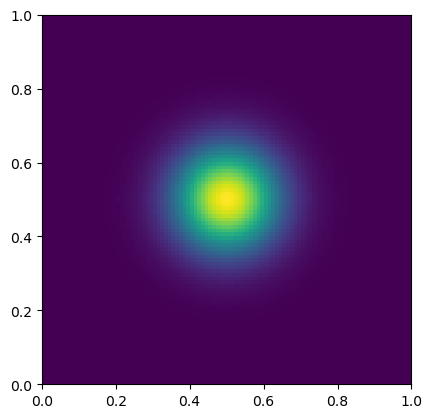

In [2]:
fun = lambda x, y: np.exp((-(x - 0.5) ** 2 - (y - 0.5) ** 2)/0.02)

x, y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
z = fun(x, y)
plt.imshow(z, extent=(0, 1, 0, 1), origin='lower', cmap='viridis')

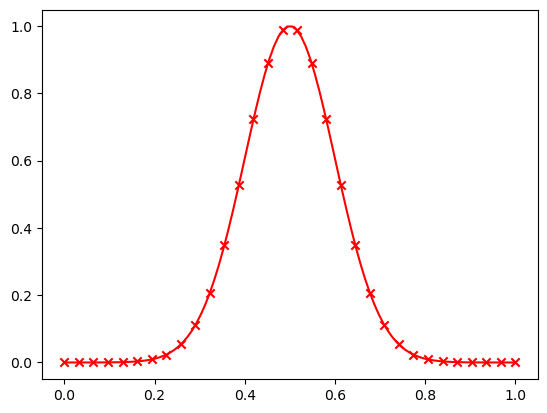

In [3]:
fun_x = lambda x: np.exp((-(x - 0.5) ** 2)/0.02)
mesh = np.linspace(0, 1, 32)
plt.plot(np.linspace(0, 1, 100), fun_x(np.linspace(0, 1, 100)), label='fun_x', color='red')
plt.scatter(np.linspace(0, 1, 32), fun_x(mesh), color='red', marker='x', label='fun_x samples')

In [4]:
simulator = PoissonSimulator()
parameters = {
    "source_strength": 1,
    "neumann_coefficient": 0,
}


problem_data = simulator.setup_problem(**parameters)
solution_data = simulator.solve_problem(problem_data)

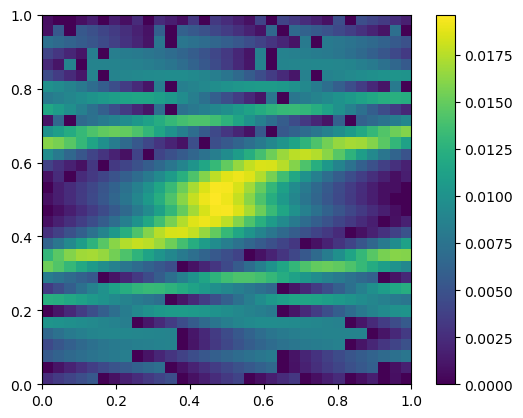

In [5]:
plt.imshow(solution_data['values'].reshape((33, 33)), extent=(0, 1, 0, 1), cmap='viridis')
plt.colorbar()

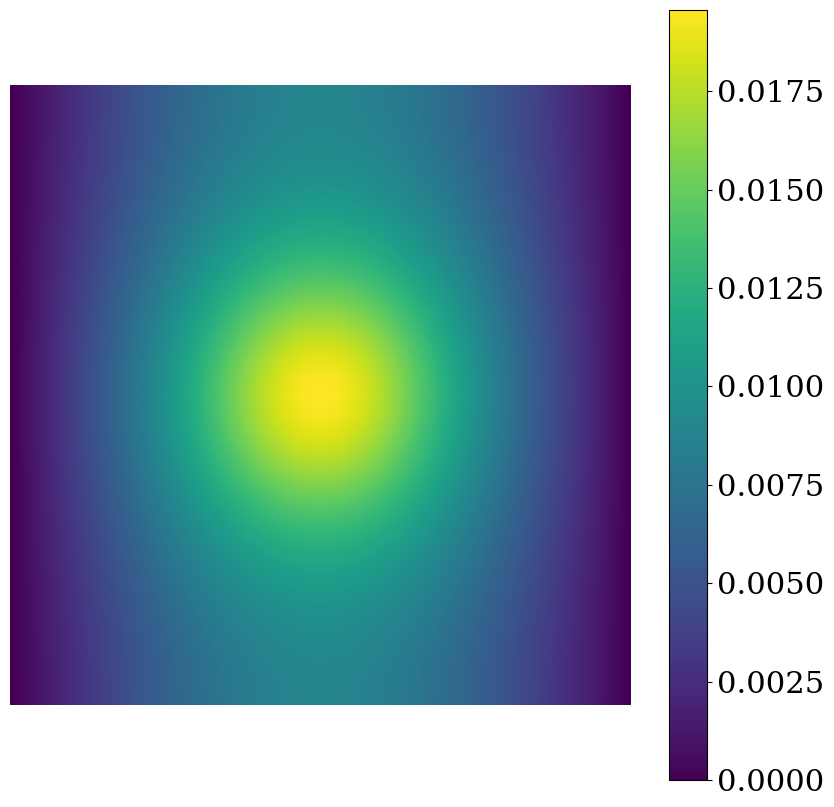

In [6]:
from dolfinx import geometry
# Square grid with 10 points per wavelength in each direction
Nx = 100
Ny = Nx


# Grid points
xmin, xmax, ymin, ymax = [0, 1, 0, 1]
plot_grid = np.mgrid[xmin:xmax:Nx * 1j, ymin:ymax:Ny * 1j]
points = np.vstack((plot_grid[0].ravel(),
                    plot_grid[1].ravel(),
                    np.zeros(plot_grid[0].size)))


# Bounding box tree for function evaluations
mesh = problem_data['mesh']
tree = geometry.bb_tree(mesh, mesh.topology.dim)
points_2d = points[:2, :]

cell_candidates = geometry.compute_collisions_points(tree, points.T)
colliding_cells = geometry.compute_colliding_cells(
            mesh, cell_candidates, points.T
        )

cells = []
points_on_proc = []

for i, point in enumerate(points.T):
            if len(colliding_cells.links(i)) > 0:
                points_on_proc.append(point)
                cells.append(colliding_cells.links(i)[0])

# Evaluate scattered and incident fields at grid points
uh = problem_data['u']
u = uh.eval(points.T, cells).reshape((Nx, Ny))


'''                     Plot field and                          '''
plt.rc('font', family='serif', size=22)
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
plt.imshow(np.fliplr(np.real(u)).T,
           extent=[0, 1, 0, 1],
           cmap=plt.cm.get_cmap('viridis'), interpolation='spline16')
plt.axis('off')
plt.colorbar()
plt.show()

In [1]:
from simulators.biharmonic_simulator import BiharmonicSimulator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
simulator = BiharmonicSimulator(mesh_size=64)
parameters = {
    "coefficient": 1,
}


problem_data = simulator.setup_problem(**parameters)
solution_data = simulator.solve_problem(problem_data)

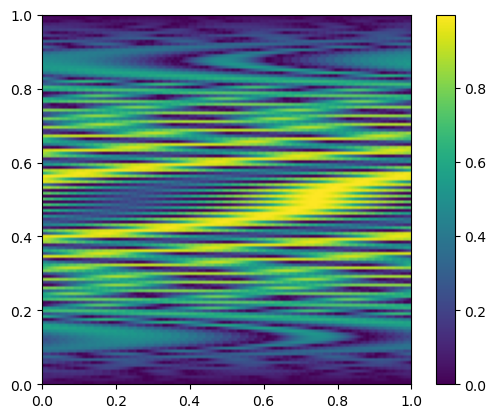

In [3]:
plt.imshow(solution_data['values'].reshape((129, 129)), extent=(0, 1, 0, 1), cmap='viridis')
plt.colorbar()

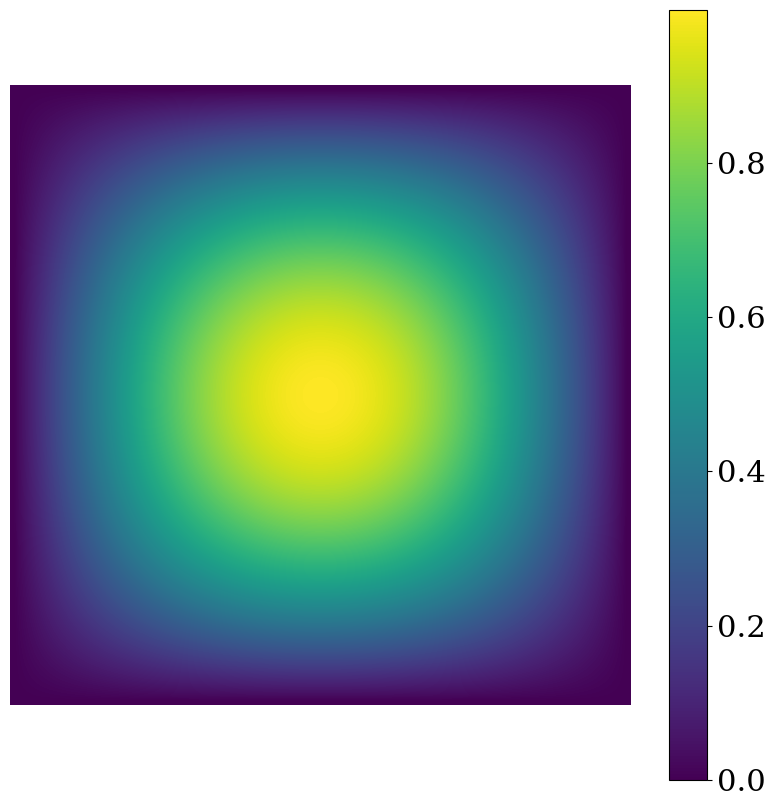

In [5]:
from dolfinx import geometry
# Square grid with 10 points per wavelength in each direction
Nx = 100
Ny = Nx


# Grid points
xmin, xmax, ymin, ymax = [0, 1, 0, 1]
plot_grid = np.mgrid[xmin:xmax:Nx * 1j, ymin:ymax:Ny * 1j]
points = np.vstack((plot_grid[0].ravel(),
                    plot_grid[1].ravel(),
                    np.zeros(plot_grid[0].size)))


# Bounding box tree for function evaluations
mesh = problem_data['mesh']
tree = geometry.bb_tree(mesh, mesh.topology.dim)
points_2d = points[:2, :]

cell_candidates = geometry.compute_collisions_points(tree, points.T)
colliding_cells = geometry.compute_colliding_cells(
            mesh, cell_candidates, points.T
        )

cells = []
points_on_proc = []

for i, point in enumerate(points.T):
            if len(colliding_cells.links(i)) > 0:
                points_on_proc.append(point)
                cells.append(colliding_cells.links(i)[0])

# Evaluate scattered and incident fields at grid points
uh = problem_data['u']
u = uh.eval(points.T, cells).reshape((Nx, Ny))


'''                     Plot field and               '''
plt.rc('font', family='serif', size=22)
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
plt.imshow(np.fliplr(np.real(u)).T,
           extent=[0, 1, 0, 1],
           cmap=plt.cm.get_cmap('viridis'), interpolation='spline16')
plt.axis('off')
plt.colorbar()
plt.show()

In [18]:
from simulators.helmholtz_simulator import HelmholtzSimulator
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [30]:

simulator = HelmholtzSimulator(mesh_size=32)
parameters = {
    "coefficient": 1,
}

start_time = time()
mesh = create_unit_square(
MPI.COMM_WORLD, 50, 50
)
problem_data = simulator.setup_problem(mesh, **parameters)
solution_data = simulator.solve_problem(problem_data)
times.append(time() - start_time)




Using coefficient n = 1


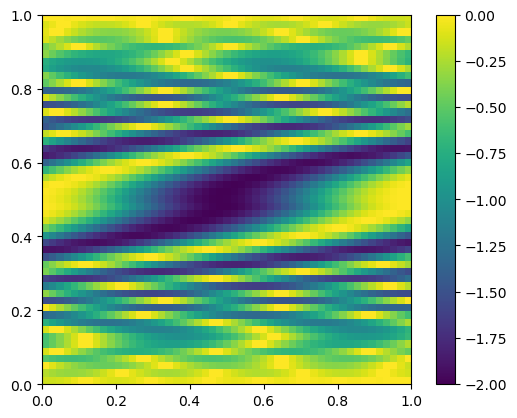

In [31]:
plt.imshow(solution_data['values'].reshape((51, 51)), extent=(0, 1, 0, 1), cmap='viridis')
plt.colorbar()

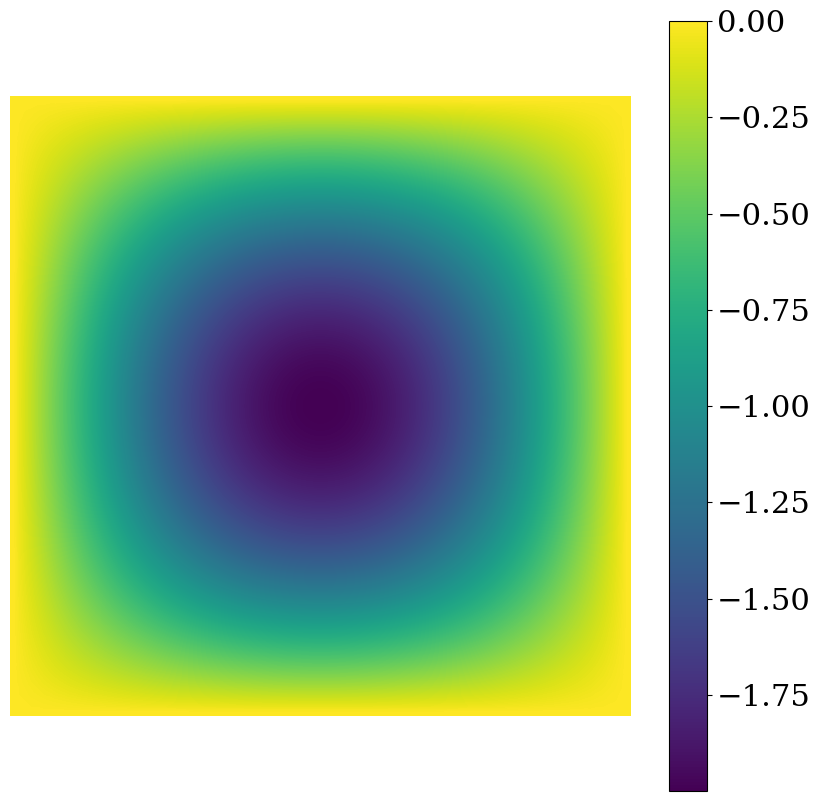

In [32]:
from dolfinx import geometry
# Square grid with 10 points per wavelength in each direction
Nx = 100
Ny = Nx


# Grid points
xmin, xmax, ymin, ymax = [0, 1, 0, 1]
plot_grid = np.mgrid[xmin:xmax:Nx * 1j, ymin:ymax:Ny * 1j]
points = np.vstack((plot_grid[0].ravel(),
                    plot_grid[1].ravel(),
                    np.zeros(plot_grid[0].size)))


# Bounding box tree for function evaluations
mesh = problem_data['mesh']
tree = geometry.bb_tree(mesh, mesh.topology.dim)
points_2d = points[:2, :]

cell_candidates = geometry.compute_collisions_points(tree, points.T)
colliding_cells = geometry.compute_colliding_cells(
            mesh, cell_candidates, points.T
        )

cells = []
points_on_proc = []

for i, point in enumerate(points.T):
            if len(colliding_cells.links(i)) > 0:
                points_on_proc.append(point)
                cells.append(colliding_cells.links(i)[0])

# Evaluate scattered and incident fields at grid points
uh = problem_data['u']
u = uh.eval(points.T, cells).reshape((Nx, Ny))


'''                     Plot field and               '''
plt.rc('font', family='serif', size=22)
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
plt.imshow(np.fliplr(np.real(u)).T,
           extent=[0, 1, 0, 1],
           cmap=plt.cm.get_cmap('viridis'), interpolation='spline16')
plt.axis('off')
plt.colorbar()
plt.show()

Generate data

In [15]:
import os
import sys
sys.path.append(os.path.abspath('../src'))

from simulators.helmholtz_simulator import HelmholtzSimulator
from simulators.helmholtz_simulator import parse_arguments
import numpy as np
import matplotlib.pyplot as plt
from dolfinx.mesh import create_unit_square
from mpi4py import MPI


# args = parse_arguments()

N = 50
# Create the simulator
# Create the simulator
simulator = HelmholtzSimulator(
    mesh_size=N*N, output_directory='../src/simulations',
)

# Define parameter ranges (for coefficient of f)
parameter_ranges = {"coefficient": (1, 20)}

mesh = create_unit_square(
    MPI.COMM_WORLD, N, N
)
# Run the simulation session

# Run the simulation session
simulator.run_session_analytical(mesh, parameter_ranges, num_simulations=20)

Saved simulation to /session_ac89d89c-2e34-4d2f-bb70-af2669a2e391/simulation_f6b53998-04b9-4645-b78d-31d09a20965e
Simulation 1 completed in 0.00 seconds.
Saved simulation to /session_ac89d89c-2e34-4d2f-bb70-af2669a2e391/simulation_444366ac-45a3-477a-8199-28a5c2bf47fc
Simulation 2 completed in 0.00 seconds.
Saved simulation to /session_ac89d89c-2e34-4d2f-bb70-af2669a2e391/simulation_dd4d79b8-e909-4136-87e8-6495bf4154ff
Simulation 3 completed in 0.00 seconds.
Saved simulation to /session_ac89d89c-2e34-4d2f-bb70-af2669a2e391/simulation_d016e00d-0326-46e0-b47c-d58308adc05b
Simulation 4 completed in 0.00 seconds.
Saved simulation to /session_ac89d89c-2e34-4d2f-bb70-af2669a2e391/simulation_0d966a20-bb6d-45de-ac03-1a714993d0af
Simulation 5 completed in 0.00 seconds.
Saved simulation to /session_ac89d89c-2e34-4d2f-bb70-af2669a2e391/simulation_60a3f610-b21f-4991-a128-ee5753241b77
Simulation 6 completed in 0.00 seconds.
Saved simulation to /session_ac89d89c-2e34-4d2f-bb70-af2669a2e391/simulation

In [15]:
mesh.geometry.x

array([[0.975, 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.025, 0.   ],
       ...,
       [0.   , 0.975, 0.   ],
       [0.025, 1.   , 0.   ],
       [0.   , 1.   , 0.   ]], shape=(1681, 3))

Test Helmholtz and Convergence

In [7]:
import os
import sys
sys.path.append(os.path.abspath('../src'))

from simulators.helmholtz_simulator import HelmholtzSimulator
import numpy as np
import matplotlib.pyplot as plt
from dolfinx.mesh import create_unit_square
from mpi4py import MPI

simulator = HelmholtzSimulator(mesh_size=150)
parameters = {
    "coefficient": 2,
}

mesh = create_unit_square(
    MPI.COMM_WORLD, 150, 150
)
problem_data = simulator.setup_problem(mesh, **parameters)
fem_solution_data = simulator.solve_problem(problem_data)
analytical_solution_data = simulator.analytical_solution(mesh, **parameters)



Using coefficient n = 2


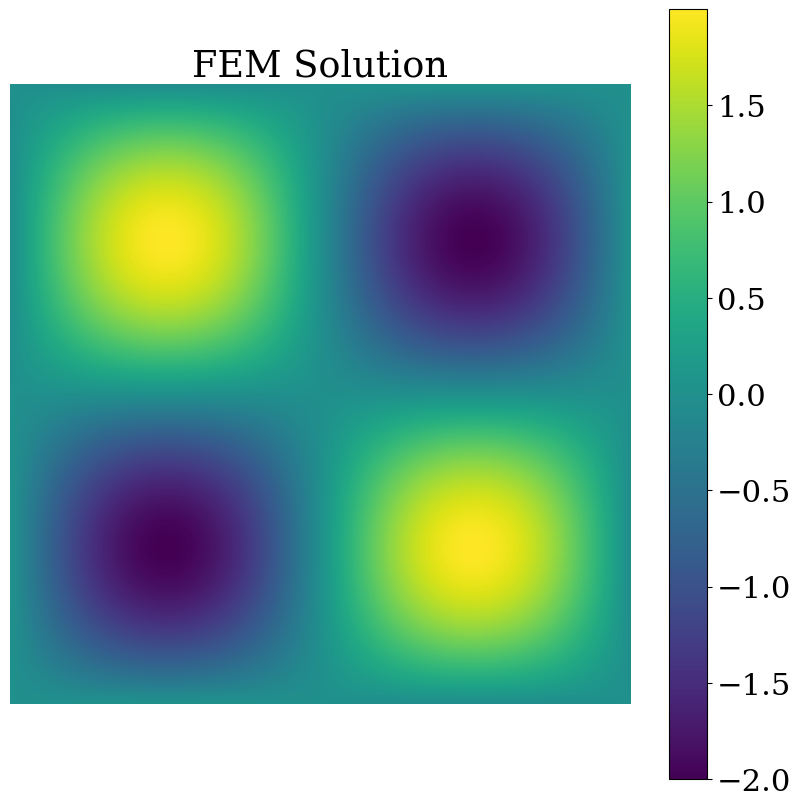

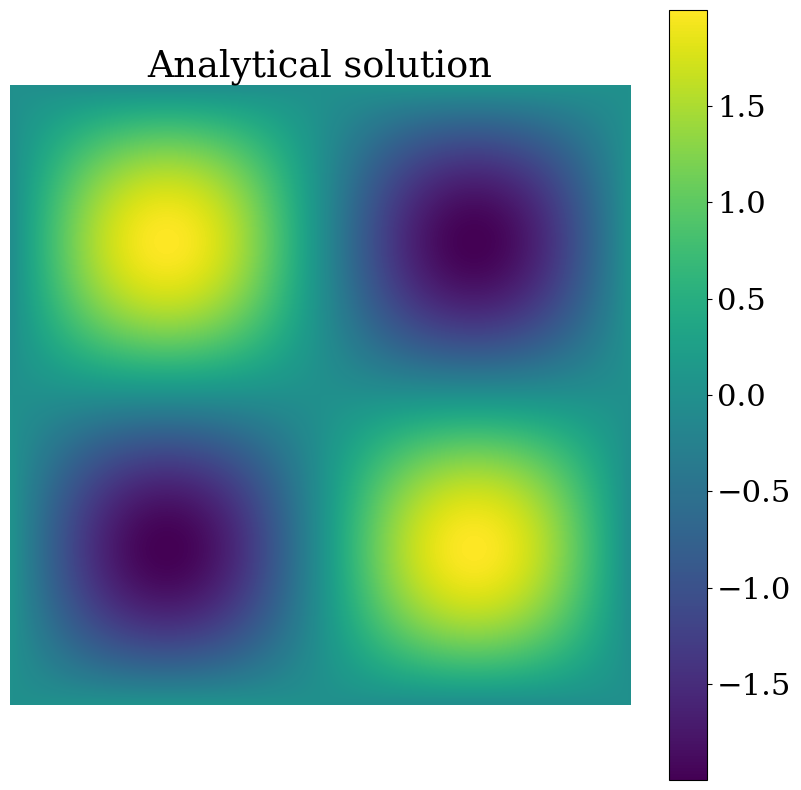

In [8]:
import dolfinx.fem as fem
from dolfinx import geometry
Nx = 100
Ny = Nx


# Grid points
xmin, xmax, ymin, ymax = [0, 1, 0, 1]
plot_grid = np.mgrid[xmin:xmax:Nx * 1j, ymin:ymax:Ny * 1j]
points = np.vstack((plot_grid[0].ravel(),
                    plot_grid[1].ravel(),
                    np.zeros(plot_grid[0].size)))


# Bounding box tree for function evaluations
tree = geometry.bb_tree(mesh, mesh.topology.dim)
points_2d = points[:2, :]

cell_candidates = geometry.compute_collisions_points(tree, points.T)
colliding_cells = geometry.compute_colliding_cells(
            mesh, cell_candidates, points.T
        )

cells = []
points_on_proc = []

for i, point in enumerate(points.T):
            if len(colliding_cells.links(i)) > 0:
                points_on_proc.append(point)
                cells.append(colliding_cells.links(i)[0])

# Evaluate scattered and incident fields at grid points
V = fem.functionspace(mesh, ("Lagrange", 1))
fem_uh = fem.Function(V)
fem_uh.x.array[:] = fem_solution_data['values']
anal_uh = fem.Function(V)
anal_uh.x.array[:] = analytical_solution_data['values']

fem_u = fem_uh.eval(points.T, cells).reshape((Nx, Ny))
anal_u = anal_uh.eval(points.T, cells).reshape((Nx, Ny))

'''                     Plot field and               '''
plt.rc('font', family='serif', size=22)
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
plt.title('FEM Solution')
plt.imshow(np.fliplr(np.real(fem_u)).T,
           extent=[0, 1, 0, 1],
           cmap=plt.cm.get_cmap('viridis'), interpolation='spline16')
plt.axis('off')
plt.colorbar()
plt.show()

plt.rc('font', family='serif', size=22)
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
plt.title('Analytical solution')
plt.imshow(np.fliplr(np.real(anal_u)).T,
           extent=[0, 1, 0, 1],
           cmap=plt.cm.get_cmap('viridis'), interpolation='spline16')
plt.axis('off')
plt.colorbar()
plt.show()


Using coefficient n = 2
Using coefficient n = 2
Using coefficient n = 2
Using coefficient n = 2
Using coefficient n = 2
Using coefficient n = 2
Using coefficient n = 2
Using coefficient n = 2


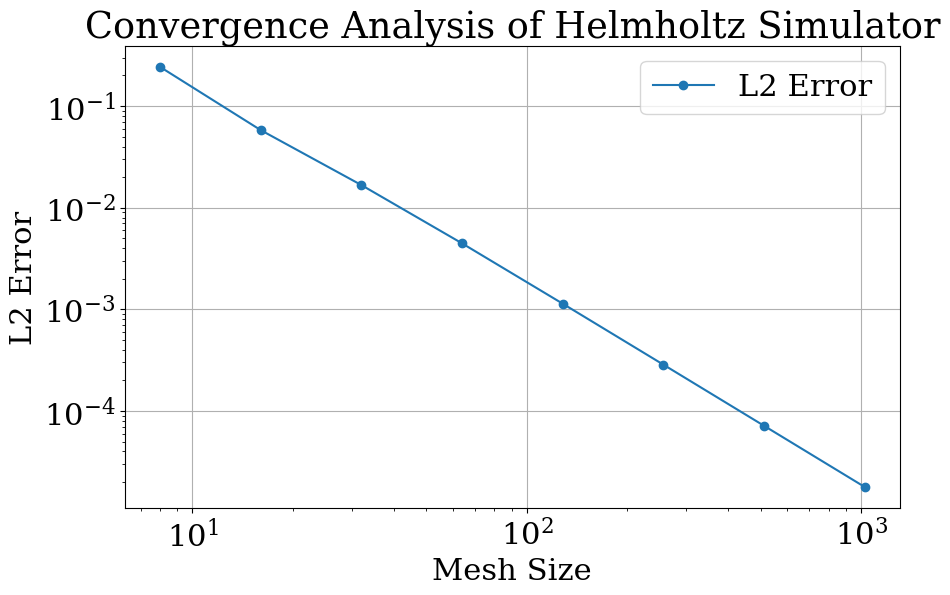

In [4]:
# Convergence analysis
from simulators.helmholtz_simulator import HelmholtzSimulator
import numpy as np
import matplotlib.pyplot as plt
from dolfinx.mesh import create_unit_square
from mpi4py import MPI

def analytical_solution(x, coefficient):
    """Analytical solution for the Helmholtz equation."""
    return -2*np.sin(coefficient * np.pi * x[0]) * np.sin(coefficient * np.pi * x[1])

# L2 convergence analysis for the Helmholtz simulator, no actual L2 norm computation
def L2_convergence_analysis(mesh_sizes, parameters):
    simulator = HelmholtzSimulator()
    errors = []

    for mesh_size in mesh_sizes:
        mesh = create_unit_square(MPI.COMM_WORLD, mesh_size, mesh_size)
        problem_data = simulator.setup_problem(mesh, **parameters)
        fem_solution_data = simulator.solve_problem(problem_data)

        # Evaluate the analytical solution at the mesh points
        points = mesh.geometry.x
        analytical_values = analytical_solution(points.T, parameters['coefficient'])
        
        # Compute the L2 error
        fem_values = fem_solution_data['values']
        error = np.linalg.norm(fem_values - analytical_values)/ np.linalg.norm(analytical_values)
        errors.append(error)

    return errors

mesh_sizes = [8, 16, 32, 64, 128, 256, 512, 1024]
parameters = {
    "coefficient": 2,
}
errors = L2_convergence_analysis(mesh_sizes, parameters)
plt.figure(figsize=(10, 6))
plt.loglog(mesh_sizes, errors, marker='o', label='L2 Error')
plt.xlabel('Mesh Size')
plt.ylabel('L2 Error')
plt.title('Convergence Analysis of Helmholtz Simulator')
plt.grid(True)
plt.legend()
plt.show()